In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl

mpl.interactive(True)

import pyqg


In [107]:
# create the model object


class Par(pyqg.QParameterization):

    def __init__(self, scale):
        super().__init__()
        self.scale = scale

    def __call__(self, m):
        return noise(m, scale=self.scale)


def init(tmax=30, dt = 0.005, U_0=1.25, scale=1.0, nscale=2.0e0):
    r = 1.0
    omega = 1.0
    beta = 2.0*omega*np.cos(np.pi/3.0)/r
    m = pyqg.BTModel(L=2.*np.pi*r, nx=64, parameterization=Par(nscale),
                     beta=beta, U=U_0, H=0.002, rek=1.0e-9, rd=None,
                     tmax=tmax, dt=dt, taveint=1,
                     ntd=4)

    m.set_q(noise(m, scale=scale))
    return m

def noise(m, scale=1.0):
    fk = m.wv != 0
    ckappa = np.zeros_like(m.wv2)
    ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1
    nhx,nhy = m.wv2.shape
    Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa
    Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
    Pi = Pi - Pi.mean()
    Pi_hat = m.fft( Pi )
    KEaux = m.spec_var( m.wv*Pi_hat )
    pih = ( Pi_hat/np.sqrt(KEaux) )
    qih = -m.wv2*pih
    qi = m.ifft(qih)

    return scale*qi

m = init()


INFO:  Logger initialized


0.0

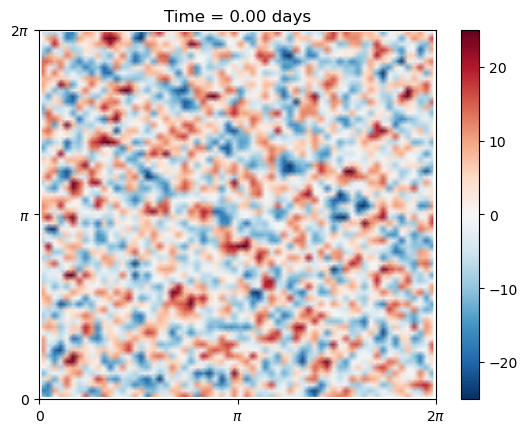

In [108]:
def subsample(*data, N=4):

    return [_.squeeze()[::N, ::N] for _ in data]


def plot_q(m, U_0=0, t=None, qmax=25.0):
    fig = plt.figure('q_plot')
    plt.clf()
    X, Y, Q=  subsample(m.x, m.y, m.q, N=1)

    pc = plt.pcolormesh(X, Y, Q, shading='gouraud', cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    plt.colorbar(pc)
    X, Y, U, V=  subsample(m.x, m.y, m.u, m.v, N=2)
    pc = plt.quiver(X, Y, U+U_0, V, alpha=0.7)
    plt.xlim([0, 2*np.pi])
    plt.ylim([0, 2*np.pi]);
    plt.xticks([0, np.pi, 2*np.pi], ['0', '$\pi$', '$2\pi$'])
    plt.yticks([0, np.pi, 2*np.pi], ['0', '$\pi$', '$2\pi$'])
    plt.title('Time = %2.2f days' % m.t)
    if t is not None:
        plt.savefig(f'img_data/fig{t:03d}.png')
plot_q(m)
m.u.max()

INFO: Step: 1000, Time: 5.00e+00, KE: 4.70e-01, CFL: 0.172


2.084435516779729
1.7949335022145725
2.080517935952526
1.867454219751583
1.8292730603530585
1.9254338173789445
2.210103088081229
2.0184919547559126
2.0245624215802263
2.3256160421474066


INFO: Step: 2000, Time: 1.00e+01, KE: 5.22e-01, CFL: 0.169


1.9580170787931763
2.0170753734095053
2.205782082545211
2.330201172805113
1.9853555495743729
1.8796674775091695
1.5523436563012751
1.593628397603446
1.9218543959641898
1.6915743527504543


INFO: Step: 3000, Time: 1.50e+01, KE: 5.33e-01, CFL: 0.147


1.6422375105949671
1.6888969508165896
2.2105218646528373
2.1621300957889567
2.1197848999179767
1.876760324414635
1.7433625925793836
1.5703268167686093
1.6618767574051363
1.8809491555817084


INFO: Step: 4000, Time: 2.00e+01, KE: 6.24e-01, CFL: 0.166


1.9468444064638006
1.7837680382156753
2.0190360139449037
1.7876960473994874
1.5409010474881972
1.3136678001442212
1.2447091570825846
1.1741301818000038
1.2444738264799102
1.5572321217988707


INFO: Step: 5000, Time: 2.50e+01, KE: 6.92e-01, CFL: 0.149


1.6614488382763641
1.721593720902016
1.8131575348147688
1.7690957320002587
1.7176301670033451
2.0861536394430478
2.2546797898645288
1.6882885423979124
1.5572838763255952
1.3068553548042638


INFO: Step: 6000, Time: 3.00e+01, KE: 7.07e-01, CFL: 0.130


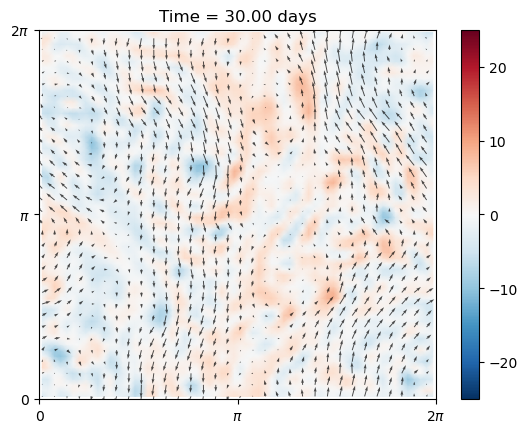

In [109]:
for k, _ in enumerate(m.run_with_snapshots(tsnapstart=5, tsnapint=0.05)):
    plot_q(m, 0.0, k)

In [110]:
ne = 50
U = np.zeros([m.nx, m.ny, ne])
V = np.zeros(U.shape)
for e in range(ne):
    m = init(tmax=10.1)
    for k, _ in enumerate(m.run_with_snapshots(tsnapstart=10, tsnapint=0.05)):
        U[:, :, e] = m.u.squeeze()
        V[:, :, e] = m.v.squeeze()

INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 5.10e-01, CFL: 0.162
INFO: Step: 2000, Time: 1.00e+01, KE: 5.77e-01, CFL: 0.170
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 4.99e-01, CFL: 0.183
INFO: Step: 2000, Time: 1.00e+01, KE: 5.01e-01, CFL: 0.167
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 5.13e-01, CFL: 0.202
INFO: Step: 2000, Time: 1.00e+01, KE: 5.57e-01, CFL: 0.167
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 4.58e-01, CFL: 0.165
INFO: Step: 2000, Time: 1.00e+01, KE: 4.50e-01, CFL: 0.208
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 4.95e-01, CFL: 0.169
INFO: Step: 2000, Time: 1.00e+01, KE: 5.70e-01, CFL: 0.165
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 4.70e-01, CFL: 0.173
INFO: Step: 2000, Time: 1.00e+01, KE: 4.94e-01, CFL: 0.155
INFO:  Logger initialized
INFO: Step: 1000, Time: 5.00e+00, KE: 4.86e-01, CFL: 0.164
INFO: Step: 2000, Time: 1.00e+01, KE: 5.05e-01, CFL

In [111]:
np.savez_compressed('U_data', U=U)
np.savez_compressed('V_data', V=V)

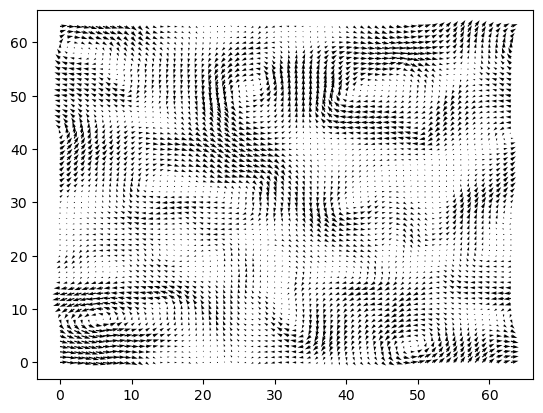

In [115]:
plt.quiver(U[:,:,10], V[:,:,10])